**Определение стоимости автомобилей**


**Описание проекта**  


Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости.  
Заказчику важны:  
 - качество предсказания;
 - скорость предсказания;
 - время обучения.

**Цель исследования**  


 - создать модель предсказания цены автомобилей, оптимальную по соотношению качество-скорость-время обучения.
 - качество модели определить метрикой RMSE, которая должна быть ниже 2600.

**Описание данных**  
Имеется датасет с 16 колонками и 350тыс строк с характеристиками транспортного средства. Целевым признаком является цена.

<h1>Ход исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Изучение-данных" data-toc-modified-id="1.-Изучение-данных-0.1">1. Изучение данных</a></span><ul class="toc-item"><li><span><a href="#1.1-Изучение-общей-информации" data-toc-modified-id="1.1-Изучение-общей-информации-0.1.1">1.1 Изучение общей информации</a></span></li><li><span><a href="#1.2-Предобработка-данных-и-EDA" data-toc-modified-id="1.2-Предобработка-данных-и-EDA-0.1.2">1.2 Предобработка данных и EDA</a></span></li></ul></li><li><span><a href="#2.-Подготовка-данных" data-toc-modified-id="2.-Подготовка-данных-0.2">2. Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#2.1-Изучение-корреляции-данных" data-toc-modified-id="2.1-Изучение-корреляции-данных-0.2.1">2.1 Изучение корреляции данных</a></span></li><li><span><a href="#2.2-Кодирование-данных-прямым-методом" data-toc-modified-id="2.2-Кодирование-данных-прямым-методом-0.2.2">2.2 Кодирование данных прямым методом</a></span></li><li><span><a href="#2.3-Разделение-данных-на--выборки-и-выделение-признаков" data-toc-modified-id="2.3-Разделение-данных-на--выборки-и-выделение-признаков-0.2.3">2.3 Разделение данных на  выборки и выделение признаков</a></span></li><li><span><a href="#2.4-Масштабирование-признаков" data-toc-modified-id="2.4-Масштабирование-признаков-0.2.4">2.4 Масштабирование признаков</a></span></li></ul></li><li><span><a href="#3.-Обучение-разных-моделей" data-toc-modified-id="3.-Обучение-разных-моделей-0.3">3. Обучение разных моделей</a></span><ul class="toc-item"><li><span><a href="#3.1-Линейная-регрессия" data-toc-modified-id="3.1-Линейная-регрессия-0.3.1">3.1 Линейная регрессия</a></span></li><li><span><a href="#3.2-Дерево-решений" data-toc-modified-id="3.2-Дерево-решений-0.3.2">3.2 Дерево решений</a></span></li><li><span><a href="#3.3-Случайный-лес" data-toc-modified-id="3.3-Случайный-лес-0.3.3">3.3 Случайный лес</a></span></li><li><span><a href="#3.4-Градиентный-бустинг" data-toc-modified-id="3.4-Градиентный-бустинг-0.3.4">3.4 Градиентный бустинг</a></span></li><li><span><a href="#3.5-Регрессия-LASSO" data-toc-modified-id="3.5-Регрессия-LASSO-0.3.5">3.5 Регрессия LASSO</a></span></li><li><span><a href="#3.6-Модель-градиентного-бустинга--LightGBM" data-toc-modified-id="3.6-Модель-градиентного-бустинга--LightGBM-0.3.6">3.6 Модель градиентного бустинга  LightGBM</a></span></li></ul></li><li><span><a href="#4-Проверка-моделей-на-тестовой-выборке" data-toc-modified-id="4-Проверка-моделей-на-тестовой-выборке-0.4">4 Проверка моделей на тестовой выборке</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-0.5">Вывод</a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-1"><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#2.-Общее-впечатление" data-toc-modified-id="2.-Общее-впечатление-2"><font color="orange">2. Общее впечатление</font></a></span></li></ul></div>

## 1. Изучение данных

### 1.1 Изучение общей информации

Импортируем нужные библиотеки:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor


In [2]:
try:
    data = pd.read_csv('D:\\Хранилище информации\\DATA SCIENCE учеба\\projects\\сборный_проект_1\\autos.csv', sep=',', encoding='utf-8')
    print('Прочитано с локального диска')
except:
    data = pd.read_csv('https://code.s3.yandex.net///datasets//autos.csv', sep=',')
display(data.head())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**Описание данных**  
***Признаки***  
DateCrawled — дата скачивания анкеты из базы  
VehicleType — тип автомобильного кузова  
RegistrationYear — год регистрации автомобиля  
Gearbox — тип коробки передач  
Power — мощность (л. с.)  
Model — модель автомобиля  
Kilometer — пробег (км)  
RegistrationMonth — месяц регистрации автомобиля  
FuelType — тип топлива  
Brand — марка автомобиля  
NotRepaired — была машина в ремонте или нет  
DateCreated — дата создания анкеты  
NumberOfPictures — количество фотографий автомобиля  
PostalCode — почтовый индекс владельца анкеты (пользователя)  
LastSeen — дата последней активности пользователя  
***Целевой признак***  
Price — цена (евро)

In [3]:
# Выведем количество строк и столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
# Создадим таблицу с данными о пропусках, добавим расчет процента пропусков от всех данных по столбцам.
omissions = data.isna().sum()
omissions = omissions.to_frame().reset_index() # сконвертим series в датафрейм
omissions = omissions.rename(columns= {0: 'value'})
#omissions.index.name = 'index'
omissions['persantage'] = (omissions['value']/len(data)*100).round(1) #выведем процент пропусков 
display(omissions[omissions['persantage']!=0])

,index,value,persantage
2,VehicleType,37490,10.6
4,Gearbox,19833,5.6
6,Model,19705,5.6
9,FuelType,32895,9.3
11,NotRepaired,71154,20.1


In [5]:
# Проверим на дубликаты
data.duplicated().sum()

4

### 1.2 Предобработка данных и EDA

Приведём названия столбцов к нижнему регистру и добавим нижнюю черту.

In [6]:
data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower() for name in data.columns]
data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'not_repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

Удалим дубликаты.

In [7]:
data = data.drop_duplicates().reset_index(drop=True)

Создадим таблицу абсолютно очишенных от пропусков данных.

In [8]:
clear_data = data.dropna()
clear_data = clear_data[clear_data['power']!=0] # также кроме пропусков, удалили нули зи столбца мощность
clear_data = clear_data.reset_index()
clear_data.shape

(236198, 17)

Исследуем уникальные значения столбцов.

In [9]:
data['vehicle_type'].value_counts()

sedan          91457
small          79830
wagon          65165
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: vehicle_type, dtype: int64

Так же в этом столбце 10.6% пропусков. Заполним пропуски на значение 'unknown'.

In [10]:
data['vehicle_type'] = data['vehicle_type'].fillna('unknown')
data['vehicle_type'].value_counts()

sedan          91457
small          79830
wagon          65165
unknown        37490
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: vehicle_type, dtype: int64

In [11]:
np.array(sorted(data['registration_year'].unique()))

array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555,
       5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200,
       8455, 8500, 8888, 9000, 9229, 9450, 9996, 99

In [12]:
len(data[ (data['registration_year']<1950) | (data['registration_year']>2019)  ])

351

Количество объектов, принадлежащих нереалистичным годам равно 351. Удалим их.

In [13]:
data = data[ (1950<=data['registration_year']) & (data['registration_year']<=2019) ]
data = data.reset_index(drop=True)
len(data)

354014

В столбце gearbox заполним пропуски на значение 'unknown'.

In [14]:
data['gearbox'] = data['gearbox'].fillna('unknown')
data['gearbox'].value_counts()

manual     268144
auto        66272
unknown     19598
Name: gearbox, dtype: int64

In [15]:
#np.array(sorted(data['power'].unique())) 
len(data[ ((data['power']>500) | (data['power']<30) ) & (data['power']!=0) ])

1330

Количество лошадиных сил меньше 30 и более 500 нереалистично. Удаляем.

In [16]:
data = data[ ( (30<=data['power']) & (data['power']<=500) ) | (data['power']==0) ]
data = data.reset_index(drop=True)
len(data)

352684

In [17]:
len(data[ data['power']==0])

39971

Огромное количество нулей. 

In [18]:
pivot_model_power = data.pivot_table(index='model', values='power',aggfunc='mean')
pivot_model_power

,power
model,
100,126.733173
145,86.469388
147,112.509632
156,137.200957
159,165.014151
...,...
yaris,73.011628
yeti,120.114943
ypsilon,58.951691


Заполним нулевую мощность средней мощностью по модели.

In [19]:
models = list(data['model'].unique())

def replace_power(row):
    new_power = 0
   
    if row['power'] == 0:
        for model in models:
            if row['model'] == model:
                new_power = pivot_model_power.loc[model, 'power']
    else:
        new_power = row['power']
    return  new_power

data['power'] = data.apply(replace_power, axis=1)
print(len(data[ data['power']==0])) # проверим, остались ли нули 

6160


Нули остались там, где нет данных о модели.

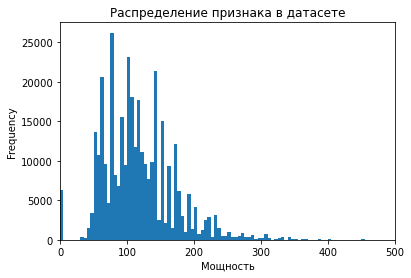

In [20]:
plt.xlabel('Мощность')
plt.xlim(0,500)
data['power'].plot(kind='hist', bins=100, title='Распределение признака в датасете')
plt.show()

In [21]:
len(data['model'].unique())

251

In [22]:
data['kilometer'].max()

150000

Средний пробег в год по оценке "Автостата" равен примерно 17,5тыс км. Километраж в данных в диапазоне реалистичных значений.

In [23]:
data['registration_month'].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9], dtype=int64)

In [24]:
len(data[data['registration_month']==0]), len(data[data['registration_month']==12])

(36907, 24192)

В данных стобца месяца регистрации явная путаница: есть значение и 0, и 12, причем значений этих типов по 22 тыс. 13 месяцев быть не может, но, возможно, часть данных была создана с форматом 0-11, а часть : 1-12. Тогда никакому значению месяца доверять сильно нельзя, если не уточнить дополнительно.

In [25]:
data['fuel_type'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [26]:
data['fuel_type'] = data['fuel_type'].fillna('unknown')

In [27]:
data['brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

In [28]:
data['not_repaired'].unique()

array([nan, 'yes', 'no'], dtype=object)

Заполним отсутсвующие данные в этом столбце. Предположим, что если машина старше 3 лет, в ремонте она  была.

In [30]:
def replace_not_repaired(row):
    
    if row['not_repaired'] == 'yes':
        new_not_repaired = 1
    elif row['not_repaired'] == 'no':
        new_not_repaired = 0
    else:
        if row['registration_year'] > 2014:
            new_not_repaired = 1
        else:
            new_not_repaired = 0
        
    return  new_not_repaired

data['not_repaired'] = data.apply(replace_not_repaired, axis=1)

In [31]:
data['number_of_pictures'].unique()

array([0], dtype=int64)

Столбец неинформативен, одни нули.

In [32]:
np.array(sorted(data['postal_code'].unique()))

array([ 1067,  1068,  1069, ..., 99994, 99996, 99998], dtype=int64)

Четрырехзначные для Европы, или просто потерялись впереди нули. Индексы могут указать на регион.

Посмотрим теперь на количество пропусков.

In [33]:
omissions = data.isna().sum()
omissions = omissions.to_frame().reset_index() # сконвертим series в датафрейм
omissions = omissions.rename(columns= {0: 'value'})
#omissions.index.name = 'index'
omissions['persantage'] = (omissions['value']/len(data)*100).round(1) #выведем процент пропусков 
display(omissions[omissions['persantage']!=0])

,index,value,persantage
6,model,19216,5.4


In [34]:
data.shape

(352684, 16)

Удалим эти 5% данных без модели.

In [35]:
data = data.dropna().reset_index(drop=True)
data.shape

(333468, 16)

Посмотрим на распределение целевого признака.

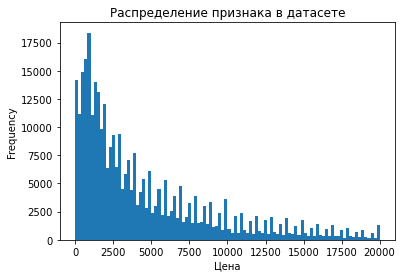

In [36]:
plt.xlabel('Цена')
#plt.xlim(0,2000)
data['price'].plot(kind='hist', bins=100, title='Распределение признака в датасете')
plt.show()

Как видно, очень низкие цены не являются выбросами. Возможно, даные авто продаются на запчасти.

Посмотрим, сколько строк содержат цену меньше или равной 1 евро.

In [38]:
len(data[data['price']<=1])

9418

Т.к. количество таких строк не очень велико относительно всего датасета, и не имея возможности уточнить природу этих выбросов, принимаем решение удалить эти значения.

In [39]:
len(data)

333468

In [41]:
data = data[data['price']>1].reset_index(drop=True)
len(data)

324050

Удалим столбцы, не представляющие инетереса для построения модели.

In [42]:
data = data.drop(['registration_month','number_of_pictures','last_seen','date_created','postal_code','date_crawled'], axis=1)

In [43]:
data.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
0,480,unknown,1993,manual,95.592222,golf,150000,petrol,volkswagen,0
1,9800,suv,2004,auto,163.000000,grand,125000,gasoline,jeep,0
2,1500,small,2001,manual,75.000000,golf,150000,petrol,volkswagen,0
3,3600,small,2008,manual,69.000000,fabia,90000,gasoline,skoda,0
4,650,sedan,1995,manual,102.000000,3er,150000,petrol,bmw,1


Посмотрим тип данных

Заменим значения на более экономичные относительно использования памяти.

Вывод: на данном шаге были изучены данный, проверены на пропуски, нулевые значения и выбросы.   
Пропуски в типе кузова, коробки передач, тип топлива были заменены на значение 'unknown'. Пропуски в данных о ремонте были заменены на значения да или нет в зависимости от возраста машины. Нулевые значения в данных о мощности были заменены на средние значения по конкретной модели. Выбросы в годах, пробеге были удалены, так же как неизвестные модели.   
В результате получили 324 тыс строк обработанных данных.

## 2. Подготовка данных

### 2.1 Изучение корреляции данных

Для того, чтобы проверить корреляцию целевого признака со всеми параметрами, применим OrdinalEncoder к категориальным столбцам.

Для моделей, основанных на деревьях, порядковое кодирование отлично подойдет. Для линейных стоит использовать прямое кодирование.

In [44]:
data_categ = data[['fuel_type','gearbox','vehicle_type','brand','model']]
encoder = OrdinalEncoder()
encoder.fit(data_categ)
data_ordinal = pd.DataFrame(encoder.transform(data_categ), columns=data_categ.columns)
data_ordinal.shape

(324050, 5)

Присоединим закодированные признаки к датафрему.

In [45]:
df_ordinal = data.drop(['fuel_type','gearbox','vehicle_type','brand','model'], axis=1)
df_ordinal = df_ordinal.join(data_ordinal)
df_ordinal.head()

,price,registration_year,power,kilometer,not_repaired,fuel_type,gearbox,vehicle_type,brand,model
0,480,1993,95.592222,150000,0,6.0,1.0,7.0,37.0,116.0
1,9800,2004,163.000000,125000,0,2.0,0.0,6.0,14.0,117.0
2,1500,2001,75.000000,150000,0,6.0,1.0,5.0,37.0,116.0
3,3600,2008,69.000000,90000,0,2.0,1.0,5.0,31.0,101.0
4,650,1995,102.000000,150000,1,6.0,1.0,4.0,2.0,11.0


In [46]:
correlations_data = df_ordinal.corr()['price'].sort_values()
correlations_data

kilometer           -0.370734
fuel_type           -0.302393
gearbox             -0.261152
not_repaired        -0.204382
brand               -0.113225
vehicle_type        -0.108133
model               -0.024222
registration_year    0.418570
power                0.513035
price                1.000000
Name: price, dtype: float64

Обнаружены неплохие показатели корреляции с целевым признаком: 2 умеренных положительных связи и 2 умеренных отрицательных. Связь с признаком "модель" почти нулевая, с признаками бренда и типа кузова - слабая.  
На основании корреляции, исключим модель из обучающих признаков.

### 2.2 Кодирование данных прямым методом

Отберём 6 лучших по корреляции признаков и применим  технику кодировки OHE к категориальным столбцам.

In [48]:
data_ohe = pd.get_dummies(data[['fuel_type','gearbox']], drop_first=True)
print(data_ohe.head(3))

   fuel_type_electric  fuel_type_gasoline  fuel_type_hybrid  fuel_type_lpg  \
0                   0                   0                 0              0   
1                   0                   1                 0              0   
2                   0                   0                 0              0   

   fuel_type_other  fuel_type_petrol  fuel_type_unknown  gearbox_manual  \
0                0                 1                  0               1   
1                0                 0                  0               0   
2                0                 1                  0               1   

   gearbox_unknown  
0                0  
1                0  
2                0  


Присоединим закодированные признаки к датафрему.

In [50]:
df = data.drop(['fuel_type','gearbox','vehicle_type','brand','model'], axis=1)
df = df.join(data_ohe)
print(df_ohe.shape)
df.head()

(324050, 14)


,price,registration_year,power,kilometer,not_repaired,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_lpg,fuel_type_other,fuel_type_petrol,fuel_type_unknown,gearbox_manual,gearbox_unknown
0,480,1993,95.592222,150000,0,0,0,0,0,0,1,0,1,0
1,9800,2004,163.000000,125000,0,0,1,0,0,0,0,0,0,0
2,1500,2001,75.000000,150000,0,0,0,0,0,0,1,0,1,0
3,3600,2008,69.000000,90000,0,0,1,0,0,0,0,0,1,0
4,650,1995,102.000000,150000,1,0,0,0,0,0,1,0,1,0


### 2.3 Разделение данных на  выборки и выделение признаков

Разделим датасет на обучающую, валидационную и тестовую выборки в отношении 60:20:20

In [51]:
target = df['price']
features = df.drop('price', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

features_train.shape, features_valid.shape, features_test.shape # проверим размеры получившихся выборок

((194430, 13), (64810, 13), (64810, 13))

### 2.4 Масштабирование признаков

In [52]:
numeric = ['registration_year', 'power', 'kilometer']

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None
print(features_train.head())

        registration_year     power  kilometer  not_repaired  \
152774           0.971014  0.277987   1.000000             1   
137358           0.956522  0.147623   1.000000             1   
58283            0.884058  0.241886   0.310345             0   
197393           0.797101  0.201774   1.000000             0   
237502           0.608696  0.171690   1.000000             0   

        fuel_type_electric  fuel_type_gasoline  fuel_type_hybrid  \
152774                   0                   0                 0   
137358                   0                   0                 0   
58283                    0                   0                 0   
197393                   0                   0                 0   
237502                   0                   0                 0   

        fuel_type_lpg  fuel_type_other  fuel_type_petrol  fuel_type_unknown  \
152774              0                0                 0                  1   
137358              0                0          

C:\Your_user\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Выборки подготовлены.

## 3. Обучение разных моделей

In [53]:
STATE = 12345 # добавим постоянную величину для случайного статуса

### 3.1 Линейная регрессия

In [54]:
%%time
model_regression = LinearRegression()
model_regression.fit(features_train,target_train)
predicted_valid = model_regression.predict(features_valid)
mse = mean_squared_error(target_valid,predicted_valid)

print("RMSE =", mse ** 0.5)

RMSE = 2932.8853934707968
Wall time: 95.4 ms


### 3.2 Дерево решений

Для деревьев входные данные подготовим на основе порядкового кодирования.

In [59]:
target_ord = df_ordinal['price']
features_ord = df_ordinal.drop(['price', 'model', 'brand', 'vehicle_type' ],  axis=1) # удалим и некоррелирующие столбцы

features_train_ord, features_valid_ord, target_train_ord, target_valid_ord = train_test_split(
    features_ord, target_ord, test_size=0.4, random_state=12345)

features_valid_ord, features_test_ord, target_valid_ord, target_test_ord = train_test_split(
    features_valid_ord, target_valid_ord, test_size=0.5, random_state=12345)

print(features_train_ord.shape, features_valid_ord.shape, features_test_ord.shape) # проверим размеры получившихся выборок

# масштабируем
scaler.fit(features_train_ord[numeric])

features_train_ord[numeric] = scaler.transform(features_train_ord[numeric])
features_valid_ord[numeric] = scaler.transform(features_valid_ord[numeric])
features_test_ord[numeric] = scaler.transform(features_test_ord[numeric])
pd.options.mode.chained_assignment = None

print(features_train_ord.head())

(194430, 6) (64810, 6) (64810, 6)
        registration_year     power  kilometer  not_repaired  fuel_type  \
152774           0.971014  0.277987   1.000000             1        7.0   
137358           0.956522  0.147623   1.000000             1        6.0   
58283            0.884058  0.241886   0.310345             0        6.0   
197393           0.797101  0.201774   1.000000             0        6.0   
237502           0.608696  0.171690   1.000000             0        6.0   

        gearbox  
152774      1.0  
137358      1.0  
58283       1.0  
197393      1.0  
237502      1.0  


Подберём гиперпараметры для модели.

In [60]:
model_tree = DecisionTreeRegressor()
parametrs = { 'max_depth': range (6,16, 2),
              'min_samples_leaf': range (1,16,5),
              'min_samples_split': range (2,12,3) }

grid = GridSearchCV(model_tree, parametrs, cv=5, verbose=1)
grid.fit(features_train_ord,target_train_ord)

grid.best_params_
#14 11 8 2088 433

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'max_depth': 14, 'min_samples_leaf': 11, 'min_samples_split': 2}

In [62]:
%%time
model_tree = DecisionTreeRegressor(random_state=STATE, max_depth=14, min_samples_leaf=11, min_samples_split=2)
model_tree.fit(features_train_ord,target_train_ord)
predicted_valid = model_tree.predict(features_valid_ord)
mse = mean_squared_error(target_valid_ord,predicted_valid)

print("RMSE =", mse ** 0.5)

RMSE = 2024.4547899649763
Wall time: 278 ms


### 3.3 Случайный лес

In [63]:
model_forest = RandomForestRegressor()
parametrs = { 'n_estimators': range (10, 50, 15),
              'max_depth': range (1,13, 5),
              'min_samples_leaf': range (1,4),
              'min_samples_split': range (2,10,4) }

grid = GridSearchCV(model_forest, parametrs, cv=5, verbose=1)

grid.fit(features_train_ord,target_train_ord)
grid.best_params_
# 11 3 6 40 2077 11

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 40}

In [67]:
%%time
model_forest = RandomForestRegressor(random_state=STATE, n_estimators=40, max_depth=11, min_samples_leaf=3, min_samples_split=2)
model_forest.fit(features_train_ord, target_train_ord)
predicted_valid = model_forest.predict(features_valid_ord)
mse = mean_squared_error(target_valid_ord, predicted_valid)

print("RMSE =", mse ** 0.5)

RMSE = 2004.9425934343296
Wall time: 6.9 s


### 3.4 Градиентный бустинг

In [69]:
model_gbr = GradientBoostingRegressor()
parametrs = { 'n_estimators': range(40, 70, 20),   
              'max_depth': range(7,13, 2),
              'min_samples_leaf': range(1,11,4),
              'min_samples_split': range(2,12,3) }

grid = GridSearchCV(model_gbr, parametrs, cv=5, verbose=1)
grid.fit(features_train,target_train)

grid.best_params_
#60 3 1 8 2207 8

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'max_depth': 11,
 'min_samples_leaf': 9,
 'min_samples_split': 8,
 'n_estimators': 60}

In [70]:
%%time
model_gbr = GradientBoostingRegressor(random_state=STATE,n_estimators=60, max_depth=11, min_samples_leaf=9, min_samples_split=8)
model_gbr.fit(features_train, target_train)
predicted_valid = model_gbr.predict(features_valid)
mse = mean_squared_error(target_valid,predicted_valid)

print("RMSE =", mse ** 0.5)

RMSE = 1914.119265472079
Wall time: 24.4 s


### 3.5 Регрессия LASSO

In [72]:
%%time
model_lasso = LassoCV()
model_lasso.fit(features_train, target_train)
predicted_valid = model_lasso.predict(features_valid)
mse = mean_squared_error(target_valid,predicted_valid)

print("RMSE =", mse ** 0.5)

RMSE = 2933.2153122568543
Wall time: 1.41 s


### 3.6 Модель градиентного бустинга  LightGBM

In [76]:
model_lgbm = LGBMRegressor()
parametrs = { 'n_estimators': range(60, 110, 20),   
              'max_depth': range(-1,14, 2)}

grid = GridSearchCV(model_lgbm, parametrs, cv=2, verbose=1)
grid.fit(features_train,target_train)

grid.best_params_

Fitting 2 folds for each of 24 candidates, totalling 48 fits


{'max_depth': -1, 'n_estimators': 100}

In [74]:
%%time
model_lgbm = LGBMRegressor(n_estimators=100, max_depth= 10)
model_lgbm.fit(features_train, target_train)
predicted_valid = model_lgbm.predict(features_valid)
mse = mean_squared_error(target_valid,predicted_valid)

print("RMSE =", mse ** 0.5)

RMSE = 1983.893021932058
Wall time: 818 ms


Нами было обучено 6 разных моделей.

## 4 Проверка моделей на тестовой выборке

Проверим модели на тестовой выборке с замером времени 

In [76]:
%%time
predicted_test = model_tree.predict(features_test_ord)
mse = mean_squared_error(target_test_ord,predicted_test)
print("RMSE =", mse ** 0.5)

RMSE = 2001.6174791677252
Wall time: 24.9 ms


In [77]:
%%time
predicted_test = model_forest.predict(features_test_ord)
mse = mean_squared_error(target_test_ord,predicted_test)
print("RMSE =", mse ** 0.5)

RMSE = 1998.5994701901636
Wall time: 268 ms


In [78]:
%%time
predicted_test = model_lgbm.predict(features_test)
mse = mean_squared_error(target_test,predicted_test)
print("RMSE =", mse ** 0.5)

RMSE = 1981.106022947848
Wall time: 199 ms


In [79]:
%%time
predicted_test = model_gbr.predict(features_test)
mse = mean_squared_error(target_test,predicted_test)
print("RMSE =", mse ** 0.5)

RMSE = 1912.937208767259
Wall time: 284 ms


In [81]:
criteria = ['модель', 'качество предсказания', 'время обучения', 'скорость предсказания']
df_compare = pd.DataFrame([['LinearRegression', 2987, 95, 'NaN' ],
                           ['DecisionTreeRegressor', 2024, 278, 25],
                           ['RandomForestRegressor', 2005, 6900, 268],
                           ['GradientBoostingRegressor', 1914, 24400, 284],
                           ['LassoCV', 2933, 1410, 'NaN'],
                           ['LGBMRegressor', 1983, 818, 199]], columns=criteria)
print('')
print('Таблица сравнения характеристик моделей')
display(df_compare)


Таблица сравнения характеристик моделей


,модель,качество предсказания,время обучения,скорость предсказания
0,LinearRegression,2987,95,NaN
1,DecisionTreeRegressor,2024,278,25
2,RandomForestRegressor,2005,6900,268
3,GradientBoostingRegressor,1914,24400,284
4,LassoCV,2933,1410,NaN
5,LGBMRegressor,1983,818,199


Из рассмотренных нами моделей наилучшее качество показала модель градиентного бустинга GradientBoostingRegressor. Однако эта модель демонстрирует самую высокую скорость обучения.  
Четыре модели показали близкое и довольно хорошее качество предсказаний, из них самая быстрая модель по времени обучения - DecisionTreeRegressor.  
Самая быстрая в скорости предсказания - DecisionTreeRegressor.

## Вывод

В результате исследования были получены следующие данные:
 - модели регрессии не показали приемелемого качества. Очевидно, для этих данных алгоритмы регрессии не подходят.
 - четыре модели с разными алгоритмами деревьев и градиентов демонстрируют приемлемое и близкое по метрике качество предсказаний. Это модели Дерево Решений, Случайный лес, модель Градиентного бустинга и LightGBM.
 - скорость обучения у LightGBM в три раза больше аналогичной у Дерева решений, но в 8 раз меньше, чем у Случайного Леса.
 - скорость и обучения, и предсказания у Дерева решений существенно ниже, чем у остальных моделей.  
 - GradientBoostingRegressor даёт самые точные предсказания, но в обучении является самой медленной моделью. По скорости предсказания модель близка к остальным моделям, кроме сверхбыстрого Дерева решений.
 
 Если качество модели - самое главное, следует выбрать самую точную модель - GradientBoostingRegressor.  
 Если качество модели важно, но и скорость имеет значение - больше подойдет модель LightGBM.   
 Если же важна именно скорость - выбираем DecisionTree. Её качество не значительно уступает остальным моделям, в то время как выигрыш в скорости весьма существенный.